In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the most recent RGB frame
tmp_dir = Path("../tmp")
npy_files = sorted(tmp_dir.glob("rgb_*.npy"))
print(f"Found {len(npy_files)} saved frames")

# Load the latest one
frame_bgr = np.load(npy_files[-1])
print(f"Loaded: {npy_files[-1].name}")
print(f"Shape: {frame_bgr.shape}, dtype: {frame_bgr.dtype}")

Matplotlib is building the font cache; this may take a moment.


Found 4 saved frames
Loaded: rgb_1766248532209.npy
Shape: (384, 512, 3), dtype: uint8


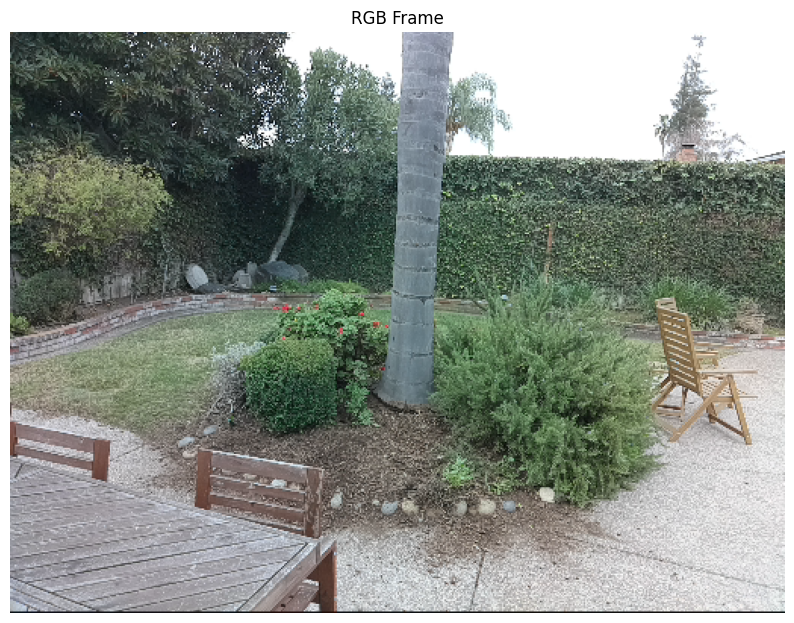

In [3]:
# Convert BGR to RGB for matplotlib display
frame_rgb = frame_bgr[:, :, ::-1]

plt.figure(figsize=(10, 8))
plt.imshow(frame_rgb)
plt.title("RGB Frame")
plt.axis("off")
plt.show()

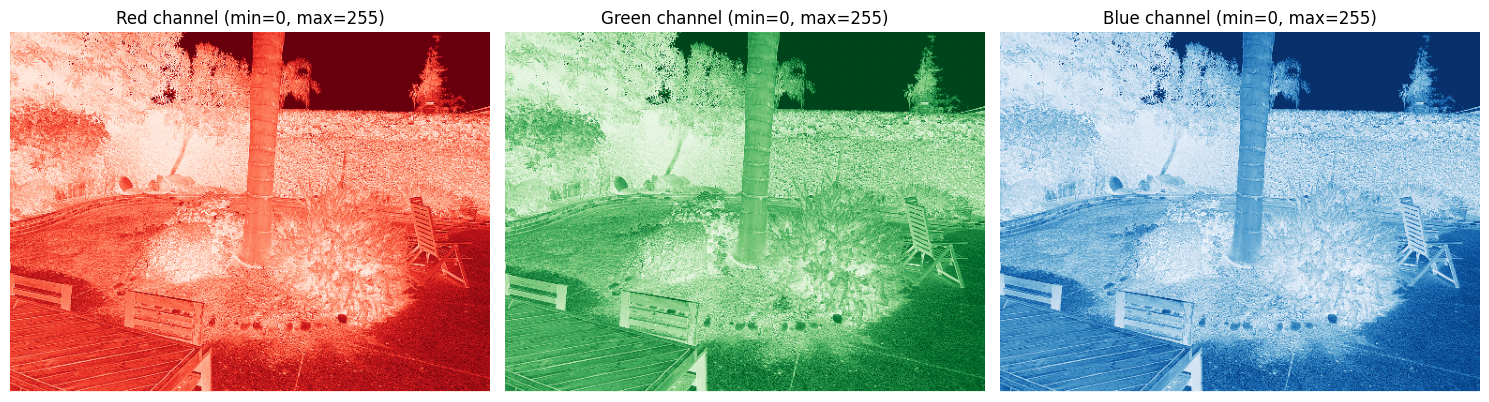

In [4]:
# Extract individual channels (BGR format from OpenCV)
b = frame_bgr[:, :, 0]
g = frame_bgr[:, :, 1]
r = frame_bgr[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(r, cmap='Reds')
axes[0].set_title(f"Red channel (min={r.min()}, max={r.max()})")
axes[1].imshow(g, cmap='Greens')
axes[1].set_title(f"Green channel (min={g.min()}, max={g.max()})")
axes[2].imshow(b, cmap='Blues')
axes[2].set_title(f"Blue channel (min={b.min()}, max={b.max()})")
for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()

In [13]:
# Compute the green mask with current logic
green_threshold = 0  # adjust this value

g_int = g.astype(np.int16)
green_mask = ((g_int - r) > green_threshold) & ((g_int - b) > green_threshold)

print(f"Green threshold: {green_threshold}")
print(f"Pixels detected as green: {green_mask.sum()} / {green_mask.size} ({100*green_mask.sum()/green_mask.size:.1f}%)")

Green threshold: 0
Pixels detected as green: 91933 / 196608 (46.8%)


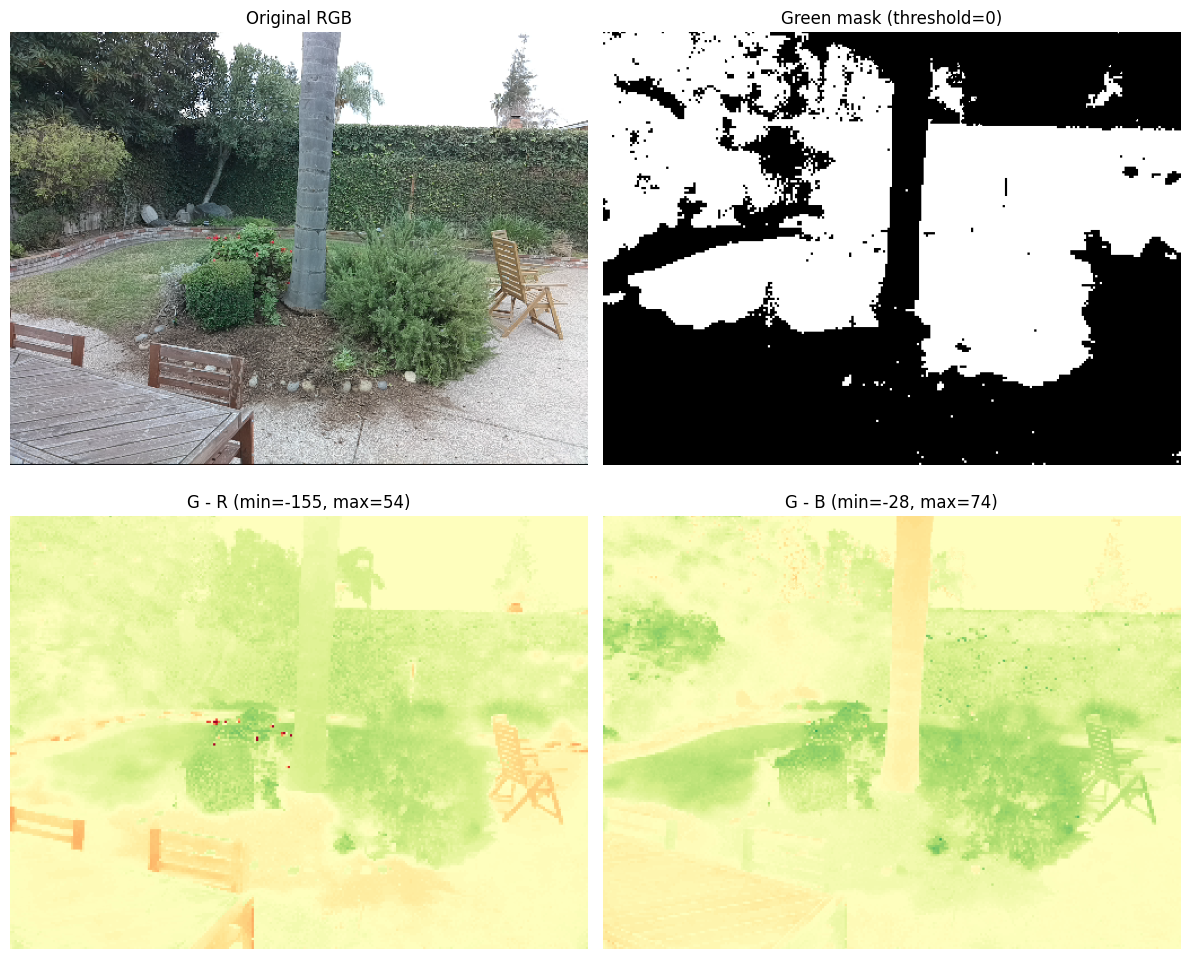

In [14]:
# Visualize the mask and differences
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(frame_rgb)
axes[0, 0].set_title("Original RGB")

axes[0, 1].imshow(green_mask, cmap='gray')
axes[0, 1].set_title(f"Green mask (threshold={green_threshold})")

# Show G - R difference
diff_gr = g_int - r
axes[1, 0].imshow(diff_gr, cmap='RdYlGn', vmin=-100, vmax=100)
axes[1, 0].set_title(f"G - R (min={diff_gr.min()}, max={diff_gr.max()})")

# Show G - B difference
diff_gb = g_int - b
axes[1, 1].imshow(diff_gb, cmap='RdYlGn', vmin=-100, vmax=100)
axes[1, 1].set_title(f"G - B (min={diff_gb.min()}, max={diff_gb.max()})")

for ax in axes.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()

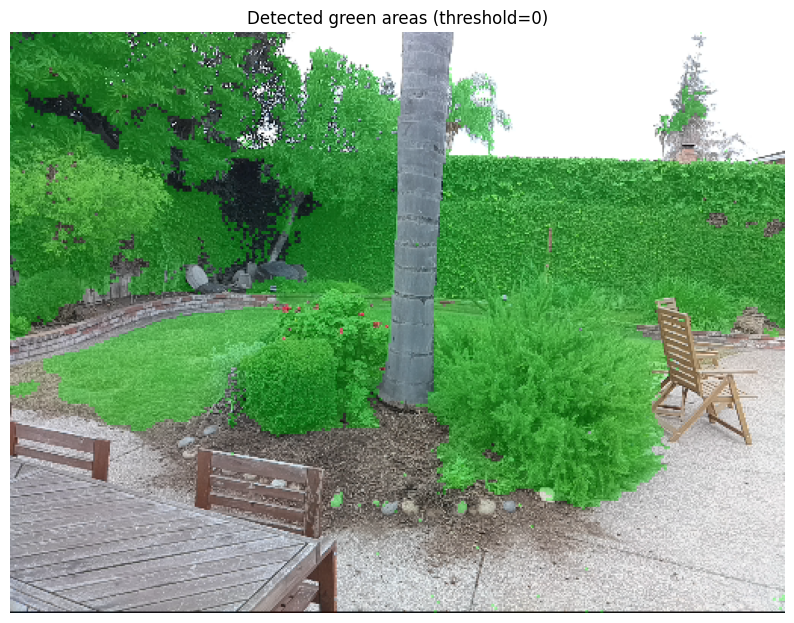

In [15]:
# Overlay mask on original image
overlay = frame_rgb.copy()
overlay[green_mask] = [0, 255, 0]  # highlight detected green pixels
blended = (0.7 * frame_rgb + 0.3 * overlay).astype(np.uint8)

plt.figure(figsize=(10, 8))
plt.imshow(blended)
plt.title(f"Detected green areas (threshold={green_threshold})")
plt.axis("off")
plt.show()